## Plot Results

Simulation code for plotting the results from the numerical experiments reported in the paper:  
**Vidit Saxena and Joakim Jaldén,"Bayesian Link Adaptation under a BLER Target", In 2020 IEEE 21st International Workshop on Signal Processing Advances in Wireless Communications (SPAWC) on May 26-29, 2020.** 

### Import Dependencies

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objects as go  # optional, only for interactive plots

plt.rcParams.update({'font.size': 30, 
                     'lines.linewidth' : 3,
                     'lines.markersize': 20})

### Load Numerical Data from Simulations

In [2]:
#filename = 'RESULT_SNR_15_TARGET_0.1_DELAY_0'
#filename = 'RESULT_SNR_15_TARGET_0.3_DELAY_0'

#filename = 'TEST'
filename = 'TEST_wei_nonstationary'

data = np.load(filename + '.npy', allow_pickle=True)[()]

In [3]:
agents = ["OLLA", "BayesLA", "TrackBayesLA", "dTS", "UCB1", "D-UCB", "VD-UCB"]
results = {}
for agent in agents:
    mcs, ack, tput = data[agent]
    results[agent] = {"ack": ack, "tput": tput}

In [4]:
plt.rcParams.update({'font.size': 30, 
                     'lines.linewidth' : 5,
                     'lines.markersize': 20})

# USER-DEFINED: Down-sampling interval for cleaner plots
interval = 10

plt_filename_prefix = 'plots/' + '_'.join( filename.split('.'))

### Average realized throughput across links with respect to transmission instances

Text(0, 0.5, 'Average Tput [bps / Hz]')

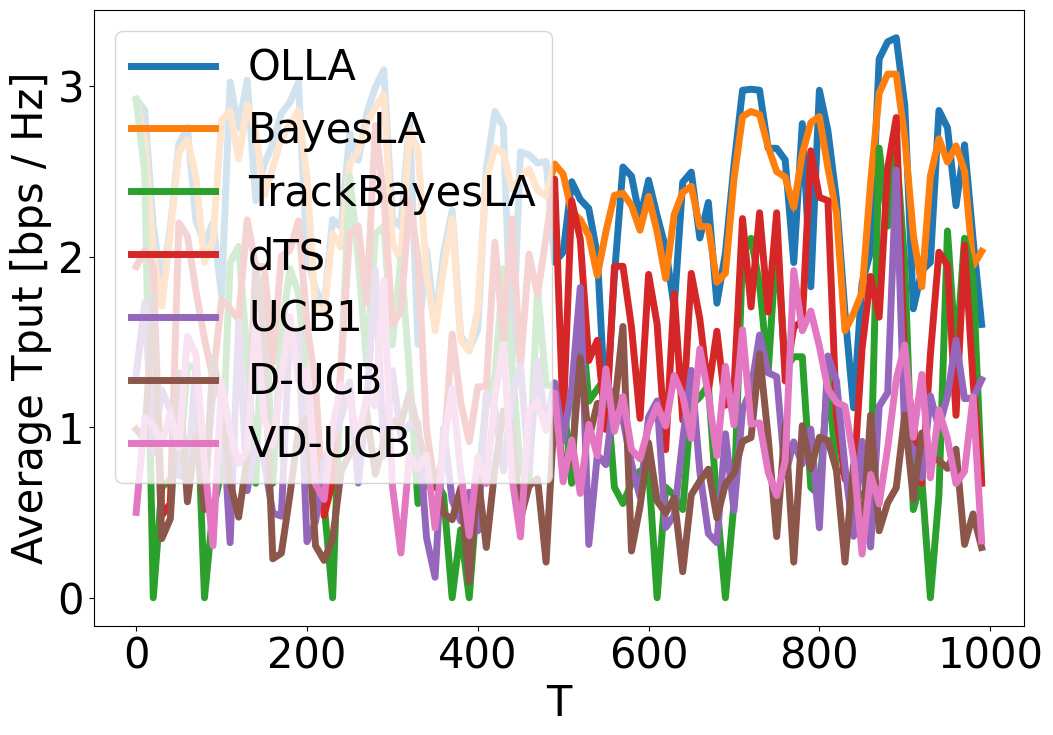

In [5]:
plt.figure( figsize = [12, 8])

x = np.arange( int( np.array(results[agents[0]]["tput"]).shape[1] / interval ) ) * interval

for agent in agents:
    plt.plot(x, np.mean(np.array(results[agent]["tput"])[:, ::interval] / (72 * 15), axis=0))

plt.legend(agents)
plt.xlabel('T')
plt.ylabel('Average Tput [bps / Hz]')

#plt.savefig(plt_filename_prefix + '_tput.eps', bbox_inches='tight')
#plt.savefig(plt_filename_prefix + '_tput.png', bbox_inches='tight')

In [9]:
# Plotly graph (optional)
fig = go.Figure()
for agent in agents:
    fig.add_trace(go.Scatter(x=x, y=np.mean(np.array(results[agent]["tput"])[:, ::interval] / (72 * 15), axis=0), name=agent))
    print(np.mean(np.mean(np.array(results[agent]["tput"])[:, ::interval] / (72 * 15), axis=0)))

fig.update_layout(title_text="Average Tput of MAB Algorithms")
fig.update_xaxes(title_text="T")
fig.update_yaxes(title_text="Average Tput [bps / Hz]")
fig.show()

2.3369925925925927
2.359762962962963
1.1509925925925926
1.6286518518518518
0.9653925925925927
0.7700296296296295
1.0033333333333332


### Average realized BLER across links with respect to transmission instances

Text(0, 0.5, 'BLER')

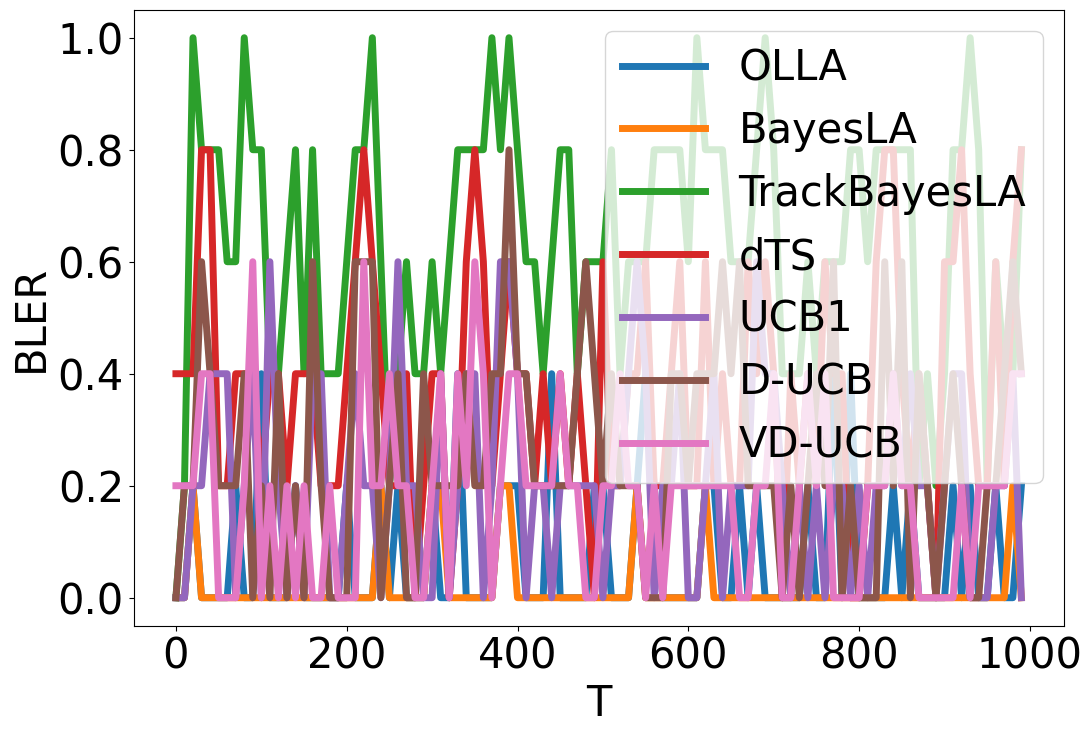

In [7]:
plt.figure( figsize = [12, 8])

for agent in agents:
    plt.plot(x, 1.0 - np.mean(np.array(results[agent]["ack"])[:, ::interval], axis=0))

plt.legend(agents)
plt.xlabel('T')
plt.ylabel('BLER')

#plt.savefig(plt_filename_prefix + '_bler.eps', bbox_inches='tight')
#plt.savefig(plt_filename_prefix + '_bler.png', bbox_inches='tight')

In [8]:
# Plotly graph (optional)
fig = go.Figure()
for agent in agents:
    fig.add_trace(go.Scatter(x=x, y=1.0 - np.mean(np.array(results[agent]["ack"])[:, ::interval], axis=0), name=agent))

fig.update_layout(title_text="Block Error Rate (BLER) of MAB Algorithms")
fig.update_xaxes(title_text="T")
fig.update_yaxes(title_text="BLER")
fig.show()